<a href="https://colab.research.google.com/github/coronarita/TIL/blob/main/Keras_Ch4_1_20240517.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

# 부동소수점 정밀도 낮춤
tf.keras.backend.set_floatx('float16')

# 영화 리뷰 분류

## IMDB

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
max([max(sequence) for sequence in train_data])

9999

리뷰를 디코딩

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = " ".join(
    [reverse_word_index.get(i-3, "?") for i in train_data[0]]
)

## 데이터 준비

In [6]:
# 정수 시퀀스 -> 멀티-핫 인코딩

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # 들어오는 데이터들 변경
    for i, sequence in enumerate(sequences):
        for j in sequence :
            results[i, j] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## 신경망 모델 만들기

### 모델 정의하기

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

### 모델 컴파일하기

In [10]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

## 훈련 검증

### 검증 세트 준비하기

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### 모델 훈련하기

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/5
30/30 [==============================] - 40s 1s/step - loss: 0.5312 - accuracy: 0.7734 - val_loss: 0.4050 - val_accuracy: 0.8682
Epoch 2/5
30/30 [==============================] - 43s 1s/step - loss: 0.3318 - accuracy: 0.8926 - val_loss: 0.3269 - val_accuracy: 0.8774
Epoch 3/5
30/30 [==============================] - 35s 1s/step - loss: 0.2507 - accuracy: 0.9194 - val_loss: 0.2871 - val_accuracy: 0.8887
Epoch 4/5
30/30 [==============================] - 38s 1s/step - loss: 0.2061 - accuracy: 0.9316 - val_loss: 0.2771 - val_accuracy: 0.8887
Epoch 5/5
30/30 [==============================] - 35s 1s/step - loss: 0.1759 - accuracy: 0.9419 - val_loss: 0.2749 - val_accuracy: 0.8882


In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## 훈련, 검증 손실 그리기

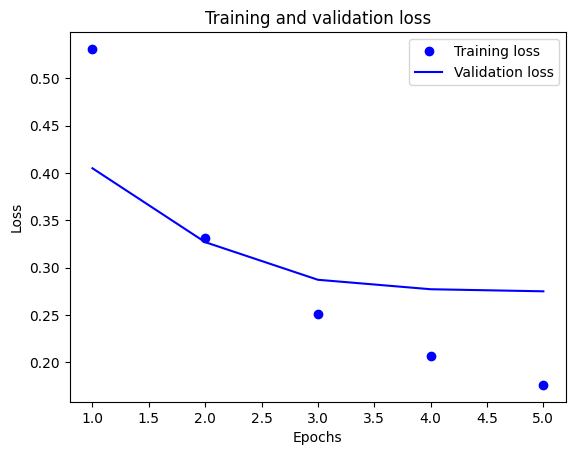

In [14]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### 모델 처음부터 다시 훈련

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 46s 926ms/step - loss: 0.4712 - accuracy: 0.8164
Epoch 2/4
49/49 [==============================] - 45s 914ms/step - loss: 0.2800 - accuracy: 0.9014
Epoch 3/4
49/49 [==============================] - 45s 921ms/step - loss: 0.2191 - accuracy: 0.9194
Epoch 4/4
782/782 [==============================] - 26s 34ms/step - loss: 0.2866 - accuracy: 0.9214


In [16]:
results # 5epochs, 92.13% accuracy for train

[0.28662109375, 0.92138671875]

### 훈련 된 모델로 예측

### 추가 실험

- 표현층 수를 1, 3개로 변경

In [17]:
# 1개
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results[1]) # 91.79

Epoch 1/4
49/49 [==============================] - 45s 913ms/step - loss: 0.4443 - accuracy: 0.8267
Epoch 2/4
49/49 [==============================] - 45s 926ms/step - loss: 0.2827 - accuracy: 0.9019
Epoch 3/4
49/49 [==============================] - 45s 917ms/step - loss: 0.2327 - accuracy: 0.9185
Epoch 4/4
782/782 [==============================] - 30s 38ms/step - loss: 0.2839 - accuracy: 0.9180
0.91796875


In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results[1]) # 91.84 ? Overfitted?

Epoch 1/4
49/49 [==============================] - 46s 917ms/step - loss: 0.4854 - accuracy: 0.8105
Epoch 2/4
49/49 [==============================] - 55s 1s/step - loss: 0.2734 - accuracy: 0.9019
Epoch 3/4
49/49 [==============================] - 45s 913ms/step - loss: 0.2129 - accuracy: 0.9185
Epoch 4/4
782/782 [==============================] - 27s 35ms/step - loss: 0.2966 - accuracy: 0.9185
0.91845703125



- 층의 유닛을 변경(64, 32 등)

In [19]:
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results[1])

Epoch 1/4
49/49 [==============================] - 95s 2s/step - loss: 0.4441 - accuracy: 0.8130
Epoch 2/4
49/49 [==============================] - 89s 2s/step - loss: 0.2644 - accuracy: 0.8989
Epoch 3/4
49/49 [==============================] - 88s 2s/step - loss: 0.2128 - accuracy: 0.9219
Epoch 4/4
782/782 [==============================] - 50s 64ms/step - loss: 0.3020 - accuracy: 0.9160
0.916015625


In [20]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results[1])

Epoch 1/4
49/49 [==============================] - 174s 4s/step - loss: 0.4465 - accuracy: 0.7964
Epoch 2/4
49/49 [==============================] - 175s 4s/step - loss: 0.2666 - accuracy: 0.8970
Epoch 3/4
49/49 [==============================] - 178s 4s/step - loss: 0.2145 - accuracy: 0.9180
Epoch 4/4
782/782 [==============================] - 94s 120ms/step - loss: 0.3423 - accuracy: 0.8950
0.89501953125


- 손실함수를 mse로 변경

In [21]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results[1])

Epoch 1/4
49/49 [==============================] - 45s 909ms/step - loss: 0.1688 - accuracy: 0.7969
Epoch 2/4
49/49 [==============================] - 45s 923ms/step - loss: 0.0944 - accuracy: 0.8926
Epoch 3/4
49/49 [==============================] - 45s 904ms/step - loss: 0.0729 - accuracy: 0.9141
Epoch 4/4
782/782 [==============================] - 30s 38ms/step - loss: 0.0833 - accuracy: 0.9219
0.921875


- relu대신 tanh 적용

In [22]:
model = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results[1])

Epoch 1/4
49/49 [==============================] - 45s 905ms/step - loss: 0.4565 - accuracy: 0.8237
Epoch 2/4
49/49 [==============================] - 44s 903ms/step - loss: 0.2686 - accuracy: 0.8999
Epoch 3/4
49/49 [==============================] - 44s 904ms/step - loss: 0.2059 - accuracy: 0.9253
Epoch 4/4
782/782 [==============================] - 26s 33ms/step - loss: 0.3096 - accuracy: 0.9097
0.90966796875
